# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜: 2022-07-04
* 이름: 고민수

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [3]:
data_path = "../../dataset/preprocessed/iris.csv"
df = pd.read_csv(data_path, header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* 예측값 분포 확인

Text(0.5, 1.0, 'all_dataset')

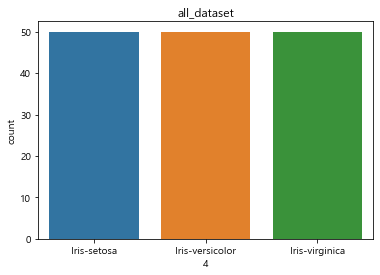

In [5]:
sns.countplot(x=df[4])
plt.title("all_dataset")

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def iris_preprocess(df, seed=seed):
  
    # x-y 분할
    x = df.values[:, :-1]
    y = df.values[:,-1]
    # 정규화 (x 데이터만)
    ss = StandardScaler()
    x = ss.fit_transform(x)
    # 원-핫 (y 데이터만)
    oe = OneHotEncoder(sparse=False)
    y = oe.fit_transform(np.expand_dims(y,1))
    print(f"원-핫 변환 순서 : {oe.categories_}")
    # train_test 분할
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed, stratify=y)
    
    print(f"데이터 형태 : {x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}, train_test 데이터 비율 : {len(x_test)/(len(x_train)+len(x_test)) : .2f}")
    print(f"첫번째 샘플 x : {x_train[0]}, y : {y_train[0]}")
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = iris_preprocess(df)

원-핫 변환 순서 : [array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
데이터 형태 : (105, 4), (45, 4), (105, 3), (45, 3), train_test 데이터 비율 :  0.30
첫번째 샘플 x : [ 0.55333328 -0.58776353  0.76275864  0.39617188], y : [0. 0. 1.]


Text(0.5, 1.0, 'test dataset')

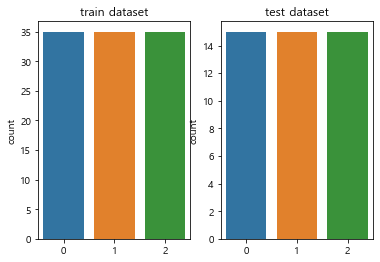

In [15]:
plt.subplot(121)
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title("train dataset")
plt.subplot(122)
sns.countplot(x=np.argmax(y_test, axis=1))
plt.title("test dataset")

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [19]:
from tensorflow.keras import models, layers, utils
import tensorflow as tf

In [51]:
class iris_model(tf.keras.Model):
    
    def __init__(self):
        super(iris_model, self).__init__()
        self._name = "iris_DNN_model"
        self._input_shape = 4
        self.D1 = layers.Dense(12, activation="ReLU", name="D1")
        self.D2 = layers.Dense(8, activation="ReLU", name="D2")
        self.D3 = layers.Dense(3, activation="Softmax", name="Output")
        
    def call(self, x):
        y = self.D1(x)
        y = self.D2(y)
        y = self.D3(y)
        return y

model = iris_model()
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=200, batch_size=8, verbose=0)
model.evaluate(x_test, y_test)

Epoch 1/200
14/14 [==============================] - 1s 1ms/step - loss: 1.2078 - accuracy: 0.6190
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 1.1488 - accuracy: 0.6190
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.6190
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0504 - accuracy: 0.6190
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0013 - accuracy: 0.6286
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9576 - accuracy: 0.6571
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.6667
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 0.8747 - accuracy: 0.6667
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 0.8299 - accuracy: 0.6762
Epoch 10/200
14/14 [==============================] - 0s 1ms/step - loss: 0.7848 - accuracy: 0.6857
Epoch 11/

Epoch 82/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9619
Epoch 83/200
14/14 [==============================] - 0s 997us/step - loss: 0.1035 - accuracy: 0.9619
Epoch 84/200
14/14 [==============================] - 0s 997us/step - loss: 0.1037 - accuracy: 0.9429
Epoch 85/200
14/14 [==============================] - 0s 997us/step - loss: 0.1054 - accuracy: 0.9524
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9524
Epoch 87/200
14/14 [==============================] - 0s 921us/step - loss: 0.0995 - accuracy: 0.9619
Epoch 88/200
14/14 [==============================] - 0s 997us/step - loss: 0.0992 - accuracy: 0.9524
Epoch 89/200
14/14 [==============================] - 0s 997us/step - loss: 0.0979 - accuracy: 0.9714
Epoch 90/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9524
Epoch 91/200
14/14 [==============================] - 0s 995us/step - loss: 0.0958 - acc

14/14 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9619
Epoch 163/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9714
Epoch 164/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9619
Epoch 165/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9619
Epoch 166/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9810
Epoch 167/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9714
Epoch 168/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9714
Epoch 169/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9714
Epoch 170/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9619
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9714
Epoc

In [25]:
def iris_model():
    x = layers.Input(shape=(4,))
    l1 = layers.Dense(12, activation="ReLU")(x)
    l2 = layers.Dense(8, activation="ReLU")(l1)
    y = layers.Dense(3, activation="Softmax")(l2)
    model = models.Model(x, y)
    return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [30]:
model = iris_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


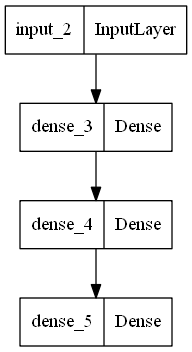

In [32]:
utils.plot_model(model)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 
* `optimizer` : 
* `metrics`: 


In [33]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [35]:
model.fit(x_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1313 - accuracy: 0.3333
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0896 - accuracy: 0.3333
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0574 - accuracy: 0.3333
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0334 - accuracy: 0.3333
Epoch 5/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0095 - accuracy: 0.3429
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9857 - accuracy: 0.3619
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9585 - accuracy: 0.4381
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9297 - accuracy: 0.5333
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 0.8998 - accuracy: 0.6000
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.7714
Epoch 11/

14/14 [==============================] - 0s 997us/step - loss: 0.1364 - accuracy: 0.9524
Epoch 83/200
14/14 [==============================] - 0s 997us/step - loss: 0.1346 - accuracy: 0.9524
Epoch 84/200
14/14 [==============================] - 0s 923us/step - loss: 0.1333 - accuracy: 0.9524
Epoch 85/200
14/14 [==============================] - 0s 995us/step - loss: 0.1334 - accuracy: 0.9429
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9429
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9524
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9524
Epoch 89/200
14/14 [==============================] - 0s 997us/step - loss: 0.1250 - accuracy: 0.9524
Epoch 90/200
14/14 [==============================] - 0s 997us/step - loss: 0.1240 - accuracy: 0.9524
Epoch 91/200
14/14 [==============================] - 0s 920us/step - loss: 0.1220 - accuracy: 0.9524

14/14 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9619
Epoch 163/200
14/14 [==============================] - 0s 997us/step - loss: 0.0761 - accuracy: 0.9619
Epoch 164/200
14/14 [==============================] - 0s 945us/step - loss: 0.0766 - accuracy: 0.9619
Epoch 165/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9619
Epoch 166/200
14/14 [==============================] - 0s 997us/step - loss: 0.0756 - accuracy: 0.9714
Epoch 167/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9714
Epoch 168/200
14/14 [==============================] - 0s 997us/step - loss: 0.0759 - accuracy: 0.9714
Epoch 169/200
14/14 [==============================] - 0s 997us/step - loss: 0.0747 - accuracy: 0.9714
Epoch 170/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9619
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [36]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9778


[0.0612109936773777, 0.9777777791023254]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [41]:
predict_y = np.argmax(model.predict(x_test), axis=1)

In [44]:
real_y = np.argmax(y_test, axis=1)

* 예측 시각화

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


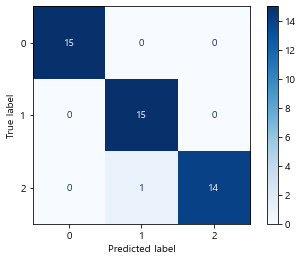

In [45]:
# 혼돈행렬 만들기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix는 정수값이 들어가야함
cm = confusion_matrix(real_y,predict_y)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap="Blues");

## 과제
---

### 로스 정리
    - BinaryCrossentropy : 1 / 0 이진분류
    - CategoricalCrossentropy: 다중 분류
    - SparseCategoricalCrossentropy: 다중 분류 (열 1개)

### | 과제1. 이진분류 / 다중분류 문제 정리

- 이진분류
    * 예측값의 범위 : 0~1
    * 예측값의 shape : (input 개수, 1)
    * 아웃풋 레이어의 노드 개수 : 1개
    * 아웃풋 레이어의 activation : sigmoid
    * 손실함수 (loss) : binary_crossentropy
    * 평가함수 (metrics) : accuracy

- 다중분류
    * 예측값의 범위 : 0~1
    * 예측값의 shape : (input 개수, class 개수)
    * 아웃풋 레이어의 노드 개수 : class 개수
    * 아웃풋 레이어의 activation : softmax
    * 손실함수 (loss) : Categorical_crossentropy, Sparse_Categorical_Crossentropy
    * 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [58]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

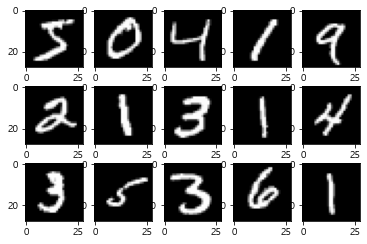

In [61]:
for i in range(15): 
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i], cmap="gray")

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [75]:
from tensorflow.keras import models, layers, utils

def build_mnistmodel():
    x = layers.Input(shape=(28,28), name="input")
    y = layers.Flatten(name="flatten")(x)
    y = layers.Dense(256, activation="relu", name="D1")(y)
    y = layers.Dense(256, activation="relu", name="D2")(y)
    y = layers.Dense(10, activation="Softmax", name="output")(y)
    model = models.Model(x, y)
    return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [76]:
model = build_mnistmodel()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 D1 (Dense)                  (None, 256)               200960    
                                                                 
 D2 (Dense)                  (None, 256)               65792     
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


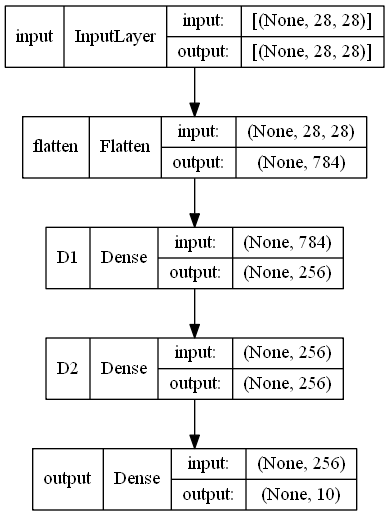

In [77]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```

In [78]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [81]:
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)

model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=0, callbacks=[tqdm_callback])

Training:   0%|                                                                                0/50 ETA: ?s,  …

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [82]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9820


[0.16870781779289246, 0.9819999933242798]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [87]:
y_pred = np.argmax(model.predict(x_test), axis=1)

* 예측 시각화

<Figure size 576x576 with 0 Axes>

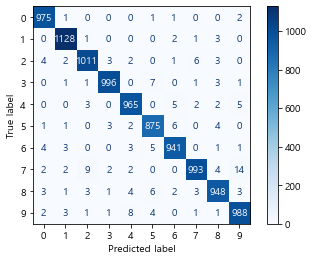

In [95]:
# 혼돈행렬 만들기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix는 정수값이 들어가야함
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues");

* 모델 활용